In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb 
from tensorflow import keras 


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
col_obj = ['Geography', 'Gender']

In [ ]:
for col in df:
    if (col in col_obj):
        print(col,":",df[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [ ]:
df= pd.get_dummies(data = df, columns=['Geography'])
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']


In [ ]:
 def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

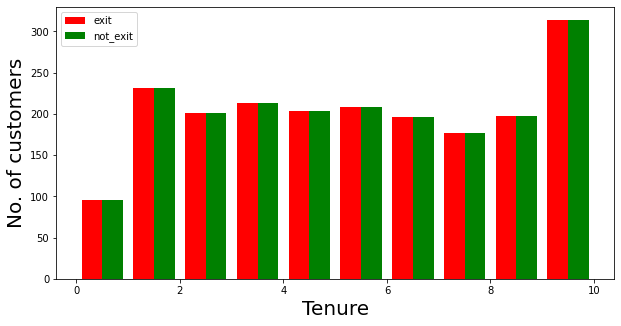

In [ ]:
visualization(df_exited, df_exited, "Tenure")

In [ ]:
df_exited2 = df[df['Exited']==1]['Age']
df_exited2 = df[df['Exited']==0]['Age']

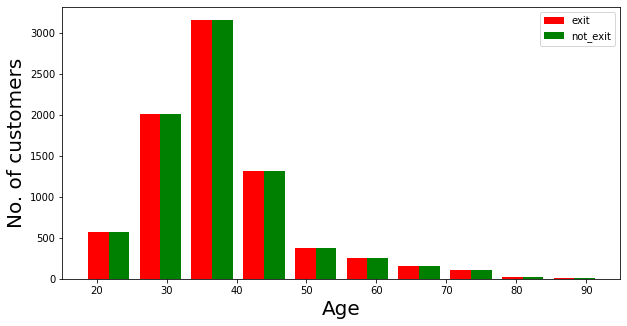

In [ ]:
visualization(df_exited2, df_exited2, "Age")

In [ ]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.275616,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.326454,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.214421,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.542636,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.688778,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
x = df.drop('Exited', axis= 'columns')
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)


Epoch 1/200
250/250 [==============================] - 4s 2ms/step - loss: 0.5104 - accuracy: 0.7726
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.8012
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.8040
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.8075
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.8135
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8159
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8159
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.8175
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.8177
Epoch 10/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4219 - accura

In [ ]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8610


[0.33393746614456177, 0.8610000014305115]

In [ ]:
yp = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)